# Names
- Jackson Paull
- Josh Dao
- Jhanvi Girish

# Problem 1

# Problem 2

# Problem 3

# Problem 4

# Problem 5

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv(r"C:\Users\Joshd\Downloads\PatientData.csv") #read csv
data.head() #view top 5 entries in csv

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


# How many patients and how many features are there?

In [116]:
print(data.count())

75       451
0        451
190      451
80       451
91       451
        ... 
0.9.2    451
2.9.1    451
23.3     451
49.4     451
8        451
Length: 280, dtype: int64


**There are 280 features and 451 patients.**

# What is the meaning of the first 4 features? See if you can understand what they mean.

<AxesSubplot:title={'center':'Feature 1'}, xlabel='75', ylabel='Count'>

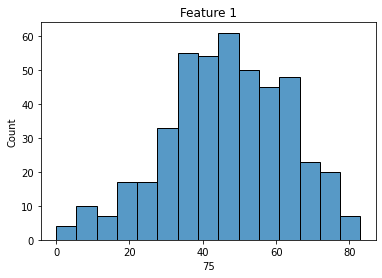

In [117]:
plt.title("Feature 1")
sns.histplot(data.iloc[:,0])

Looking at this distrubtion, we can see that the range of the data is between 0 to 85 and the mean is around 50.  This feature must therefore be Age.

<AxesSubplot:title={'center':'Feature 2'}, xlabel='0', ylabel='count'>

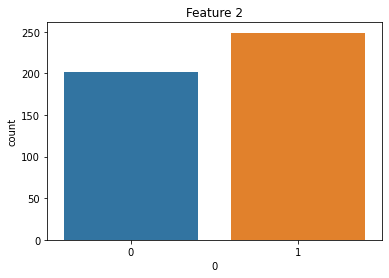

In [118]:
plt.title("Feature 2")
sns.countplot(x=data.iloc[:,1])

Being a binary classifer with there being only 2 options (0 and 1), this feature must indicate some sort of trait or status that only has 2 options.  The most logical choice would be the gender/sex of the patient.

<AxesSubplot:title={'center':'Feature 3'}, xlabel='190', ylabel='Count'>

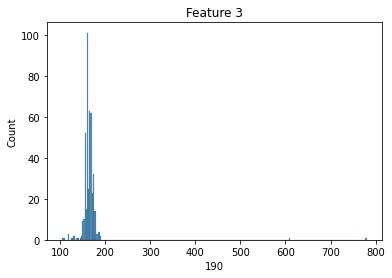

In [119]:
plt.title("Feature 3")
sns.histplot(data.iloc[:,2])

Looking at this histogram, the range of the dataset is between 100 to a little under 200 with a mean of about 150.  This feature most likely indicates the height of the patient in cm.  Furthermore, we can see that there are 2 outliers in the data at around 600 and 800. However looking at the features for these 2 patients, we can see that these 2 entries are most likely mistakes since it is almost impossible for there to be a 1 year old female with a height of 780cm or 25.6ft.  Therefore we can disregard these two entires since they are likely noise. 

<AxesSubplot:title={'center':'Feature 4'}, xlabel='80', ylabel='Count'>

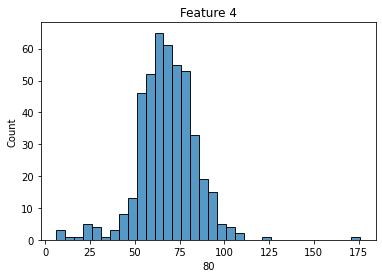

In [120]:
plt.title("Feature 4")
sns.histplot(data.iloc[:,3])

This feature has a range of a little above 0 to 175 with a mean of roughly 70.  This feature most likely depicts the patients weight in kilograms.

**Looking at the charts and distribution for each feature, the first 4 features are most likely Age, Sex, Weight, and Height.**

# Are there missing values? Replace them with the average of the corresponding feature column


In [121]:
data.iloc[:,[13,14]] = data.iloc[:,[13,14]].apply(pd.to_numeric,errors='coerce') #Change dtype from object to float in order to use mean()
data.iloc[:,13].replace(np.NaN, data.iloc[:,13].mean() ,inplace=True)  #Replace all NaN (Not a number) with mean
data.iloc[:,14].replace(np.NaN, data.iloc[:,14].mean() ,inplace=True)
print(data.iloc[:,13])
print("\n")
print(data.iloc[:,14])


0      -13.592105
1       23.000000
2      -13.592105
3      -13.592105
4      -13.592105
          ...    
446    -13.592105
447    -13.592105
448     84.000000
449    103.000000
450    -13.592105
Name: ?, Length: 451, dtype: float64


0      53.000000
1      75.000000
2      71.000000
3      74.488889
4      84.000000
         ...    
446    63.000000
447    73.000000
448    84.000000
449    80.000000
450    75.000000
Name: 63, Length: 451, dtype: float64


# How could you test which features strongly influence the patient condition and which do not?


We can plot each feature and see which have a strong correlation to each other. Any feature that has little to no correlation to any other features can be discarded in our training set.

<AxesSubplot:xlabel='75', ylabel='80'>

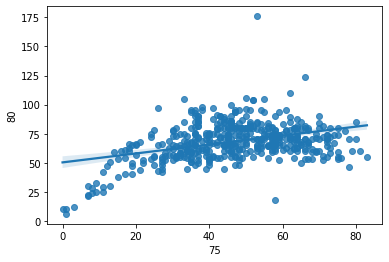

In [122]:
sns.regplot(x=data.iloc[:,0], y=data.iloc[:,3])

For example after plotting the 1st and 4th feature, we can see there is a positive correlation between age and height.  Therefore we should keep these features.

The 3 most important features I belive are Age, Weight, and Height